# AI Project - Phase 2 (Destination Suggestion)
<div style="text-align: center">
<h1 style = "color: red"> Sharif University Of Technology</h1>
<h2 style = "color: green"> DR. Mahdieh Soleymani | DR. MohammadHossein Rohban </h2>
<h3 style = "color: cyan"> Head of Project: AmirHossein Razlighi <h3>
<h3 style = "color: cyan"> Designed By: AmirHossein Razlighi, Javad Hezareh, Payam Taebi, Alireza Sakhaei, Ali Banayeean, Yalda Shabanzadeh, Hamidreza Yaghoubi, Alireza Heidari <h3>
<h4 style = "color: white"> Ask your questions via quera</h4>
<h5> Save your file with format: STUDENT NUMBER_Phase2.ipynb or .zip </h5>
</div>

## Overview

<div style="text-align: center">
<img src="./Images/Uber_research.jpg" width="100%" height="auto" />
</div>

Suppose you are a research engineer at Uber and you are asked to design a system that suggests destinations to the passengers. The system should be able to suggest destinations based on the passenger's history. For example, one passenger may save a variety of locations (like home, work, gym, etc.). This passenger may go to gym, often on weekends and when he/she requests a car from Home. 

So, for example, if I am a student, going to university usually from Saturday to Wednesday on 8:00 from "home", the next time I request a car from "home" on 8:00, the system should suggest "university" as the destination. Now, it's not that simple always, so we should seek for smart wayys to solve this problem!

As you may understood by now, we should engineer some of features from the data we have and try to predict the next destination of the passenger.

Let's begin!

## Setup

In [1]:
import random
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

random.seed(2024)
np.random.seed(2024)

# First Approach: Using KNN

## Data Preparation for KNN

In this part, you should prepare the data for KNN. You should load the dataset file that we provided, named `Data/output.json` and then clean it, do all the required preprocessings and then split into train-test-val sets if necessary. Note that we provided a splitted test set for you, named `Data/output_test.json`. You should not use this file for training or validation. You should only use it for testing your model.

In [2]:
# TODO: Load the dataset for training
data = pd.read_json('Data/output.json')
data.head()

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,0,0,35.625,51.375,36.000,51.085,2024-01-31 13:07:00,2024-01-31 14:43:00,43.99
1,0,0,36.000,51.085,35.625,51.375,2024-01-31 15:13:00,2024-01-31 16:49:00,36.66
2,0,0,35.680,51.445,35.745,51.465,2024-01-31 20:41:00,2024-01-31 20:54:00,15.08
3,0,0,35.745,51.465,35.680,51.445,2024-01-31 21:24:00,2024-01-31 21:37:00,10.00
4,0,1,35.625,51.375,35.680,51.445,2024-01-31 23:38:00,2024-01-31 23:58:00,19.48


In [3]:
# TODO: Load the dataset for testing
test_data = pd.read_json('Data/output_test.json')
test_data.head()

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,24,6,35.650,51.225,35.640,51.270,2024-01-31 11:58:00,2024-01-31 12:12:00,10.00
1,46,2,35.625,51.250,35.690,51.295,2024-01-31 21:58:00,2024-01-31 22:18:00,11.84
2,27,5,35.650,51.225,35.865,51.045,2024-01-31 20:05:00,2024-01-31 20:58:00,23.36
3,7,4,35.875,51.375,35.890,51.315,2024-01-31 17:39:00,2024-01-31 18:17:00,13.74
4,27,3,35.625,51.375,35.650,51.385,2024-01-31 13:16:00,2024-01-31 13:19:00,15.08


In [4]:
# print out the number of unique users and also randomly select one user
# TODO
print('Number of unique users:    ', len(data['user_id'].unique()))
print('Randomly selected user id: ', data['user_id'].unique()[random.randint(0, len(data['user_id'].unique()))])

Number of unique users:     60
Randomly selected user id:  30


In [5]:
from keplergl import KeplerGl

# Uncomment the following line if you are using Google Colab
# from google.colab import output
# output.enable_custom_widget_manager()

In [6]:
# choose the data related to the randomly selected user
# show destinations of this user on map
# You should Use Kepler.gl to visualize the data

# TODO
user_id = data['user_id'].unique()[random.randint(0, len(data['user_id'].unique()))]
user_data = data[data['user_id'] == user_id]
map_1 = KeplerGl(height=400)
map_1.add_data(data=user_data[['dest lat' , 'dest lon']], name='user_data')


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [7]:
# Sample output:
map_1

KeplerGl(data={'user_data': {'index': [3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083,…

Here, you should do feature engineering stuff! Extract the features that you think are important. Split the features into training set and also extract the related outputs (used for our model further). These outputs may be strings (name of destination) or destination's latitude/longitude or etc. Use your creativity!

In [8]:

# Preprocessing Training Data
# Break down the start_time and end_time into hour, minute, and second
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])
data['start_hour'] = data['start_time'].dt.hour
data['start_minute'] = data['start_time'].dt.minute
data['start_second'] = data['start_time'].dt.second
data['end_hour'] = data['end_time'].dt.hour
data['end_minute'] = data['end_time'].dt.minute
data['end_second'] = data['end_time'].dt.second
data = data.drop(['start_time', 'end_time'], axis=1)
# Make user_id one-hot encoded
user_id = pd.get_dummies(data['user_id'])
data = pd.concat([data, user_id], axis=1)
data = data.drop(['user_id'], axis=1)




# Preprocessing Test Data
# Break down the start_time and end_time into hour, minute, and second
test_data['start_time'] = pd.to_datetime(test_data['start_time'])
test_data['end_time'] = pd.to_datetime(test_data['end_time'])
test_data['start_hour'] = test_data['start_time'].dt.hour
test_data['start_minute'] = test_data['start_time'].dt.minute
test_data['start_second'] = test_data['start_time'].dt.second
test_data['end_hour'] = test_data['end_time'].dt.hour
test_data['end_minute'] = test_data['end_time'].dt.minute
test_data['end_second'] = test_data['end_time'].dt.second
test_data = test_data.drop(['start_time', 'end_time'], axis=1)
# Make user_id one-hot encoded
user_id = pd.get_dummies(test_data['user_id'])
test_data = pd.concat([test_data, user_id], axis=1)
test_data = test_data.drop(['user_id'], axis=1)



# Spliting the data into input and output
x_train = data.drop(['dest lat', 'dest lon'], axis=1)
y_train = data[['dest lat', 'dest lon']]
x_test = test_data.drop(['dest lat', 'dest lon'], axis=1)
y_test = test_data[['dest lat', 'dest lon']]

In [9]:
x_train.head()

,Day,origin lat,origin lon,price,start_hour,start_minute,start_second,end_hour,end_minute,end_second,...,50,51,52,53,54,55,56,57,58,59
0,0,35.625,51.375,43.99,13,7,0,14,43,0,...,False,False,False,False,False,False,False,False,False,False
1,0,36.000,51.085,36.66,15,13,0,16,49,0,...,False,False,False,False,False,False,False,False,False,False
2,0,35.680,51.445,15.08,20,41,0,20,54,0,...,False,False,False,False,False,False,False,False,False,False
3,0,35.745,51.465,10.00,21,24,0,21,37,0,...,False,False,False,False,False,False,False,False,False,False
4,1,35.625,51.375,19.48,23,38,0,23,58,0,...,False,False,False,False,False,False,False,False,False,False


In [10]:
y_train.head()

,dest lat,dest lon
0,36.000,51.085
1,35.625,51.375
2,35.745,51.465
3,35.680,51.445
4,35.680,51.445


In [11]:
# print out the shape of the train and test dataframes
# TODO
print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test:  ', x_test.shape)
print('Shape of y_test:  ', y_test.shape)

Shape of x_train:  (17994, 70)
Shape of y_train:  (17994, 2)
Shape of x_test:   (4499, 70)
Shape of y_test:   (4499, 2)


In [12]:
from sklearn.preprocessing import MinMaxScaler

def normalize_dataframe(df):
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    for column in df.columns:
        df_normalized[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

    return df_normalized

In [13]:
# Normalizing the train and test dataframes
x_train_normalized = normalize_dataframe(x_train)
x_test_normalized = normalize_dataframe(x_test)

## KNN Model

In this section, we are going to implement our KNN model. For further information on how KNN works, please refer to [this](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) link. As you can see, it's a simple algorithm. We will start with this and see the results of our _destination suggestion_ system.

In [14]:
# # Define the model
# # TODO: You can change the signature of functions and also add any function you need

class NearestNeighbor():
    def __init__(self):
        self.train_X = None
        self.train_y = None
        self.dest_lat_dict = {}
        self.dest_lon_dict = {}

    def fit(self, train_X, train_y):
        self.train_X = train_X
        self.train_y = train_y
        for i in range(len(train_y)):
            if train_y.iloc[i]['dest lat'] not in self.dest_lat_dict:
                self.dest_lat_dict[train_y.iloc[i]['dest lat']] = 0
            if train_y.iloc[i]['dest lon'] not in self.dest_lon_dict:
                self.dest_lon_dict[train_y.iloc[i]['dest lon']] = 0

    def predict(self, x: pd.DataFrame, k):
        predictions = []
        x = np.array(x)

        for row in x:
            distances = np.linalg.norm(self.train_X - row, axis=1)
            nearest_neighbor_indices = np.argsort(distances)[:k]
            
            epsilon = 0.00001
            for index, i in enumerate(nearest_neighbor_indices):
                self.dest_lat_dict[self.train_y.iloc[i]['dest lat']] += 1 + (epsilon/(index + 1))
                self.dest_lon_dict[self.train_y.iloc[i]['dest lon']] += 1 + (epsilon/(index + 1))

            prediction_lat = max(self.dest_lat_dict, key=self.dest_lat_dict.get)
            prediction_lon = max(self.dest_lon_dict, key=self.dest_lon_dict.get)
            
            predictions.append([prediction_lat, prediction_lon])
            
            for key in self.dest_lat_dict:
                self.dest_lat_dict[key] = 0
            for key in self.dest_lon_dict:
                self.dest_lon_dict[key] = 0
            
        return np.array(predictions)

In [15]:
# Fit the model on training data
# TODO
model = NearestNeighbor()
model.fit(x_train_normalized, y_train)

In [16]:
# Calculate the accuracy on training data
# TODO
predictions = model.predict(x_train_normalized, k=3)
predictions = np.array(predictions)

In [17]:
accuracy = np.mean((predictions == np.array(y_train)) == np.array([True, True]))
print('Accuracy on training data: ', accuracy)

Accuracy on training data:  0.942591975102812


In [18]:
# Calculate the accuracy on test data
# TODO
predictions = model.predict(x_test_normalized, k=3)
predictions = np.array(predictions)

In [19]:
accuracy = np.mean((predictions == np.array(y_test)) == np.array([True, True]))
print('Accuracy on test data: ', accuracy)

Accuracy on test data:  0.6086908201822627


**QUESTION**: What do you think about this approach? Is it a good idea to use KNN for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

**Your Answer**: 
using KNN for predicting passenger destinations based on travel histories can be a reasonable choice, especially for relatively simple and locally smooth patterns. However, as the complexity of patterns increases, and the dataset becomes more complicated, other models might be more robust and provide better performance. Consideration should be given to the computational cost and the sensitivity of KNN to noise and outliers in the data.


# Second Approach: Using XGBoost

In this part, we are going to use XGBoost to predict the next destination of the passenger. You can use `xgboost` library to implement this model. To learn more about XGBoost, please refer to [this](https://en.wikipedia.org/wiki/XGBoost) link. It should be familiar to you, as you saw decision trees in the class.

For this part, you can use the same data (that you did all the processes on) from the previous part. Or, if you need, you can reload the dataset and do new preprocessings on it.

You can see the overview of how XGBoost works in the image below:

<dev style="text-align: center">
<img src="./Images/XGBoost.png" />
</dev>

Although, this is for more information and you **do not** need to implement `XGBoost` from scratch. You can use the library that we mentioned above.

In [20]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
import xgboost as xgb

# Defining the model
# TODO: You can change the signature of functions and also add any function you need
class Encoder():
    def __init__(self):
        self.dest_lat_dict = None
        self.dest_lon_dict = None
        self.dest_lat_dict_inv = None
        self.dest_lon_dict_inv = None
        
    def fit(self, y):
        self.dest_lat_dict = {value: key for key, value in enumerate(y['dest lat'].unique())}
        self.dest_lon_dict = {value: key for key, value in enumerate(y['dest lon'].unique())}
        self.dest_lat_dict_inv = {key: value for key, value in enumerate(y['dest lat'].unique())}
        self.dest_lon_dict_inv = {key: value for key, value in enumerate(y['dest lon'].unique())}

    def transform(self, y):
        y_new = y.copy()
        y_new['dest lat'] = y_new['dest lat'].map(self.dest_lat_dict)
        y_new['dest lon'] = y_new['dest lon'].map(self.dest_lon_dict)
        return y_new
        
    def inverse_transform(self, enc):
        enc_new = enc.copy()
        enc_new['dest lat'] = enc_new['dest lat'].map(self.dest_lat_dict_inv)
        enc_new['dest lon'] = enc_new['dest lon'].map(self.dest_lon_dict_inv)
        return enc_new

In [22]:
print('Unique values of dest lat in training data:', len(y_train['dest lat'].unique()))
print('Unique values of dest lon in training data:', len(y_train['dest lon'].unique()))
print('Unique values of dest lat in test data:', len(y_test['dest lat'].unique()))
print('Unique values of dest lon in test data:', len(y_test['dest lon'].unique()))
print('Unique values of dest lat in all data:', len(data['dest lat'].unique()))
print('Unique values of dest lon in all data:', len(data['dest lon'].unique()))

Unique values of dest lat in training data: 64
Unique values of dest lon in training data: 65
Unique values of dest lat in test data: 64
Unique values of dest lon in test data: 65
Unique values of dest lat in all data: 64
Unique values of dest lon in all data: 65


In [23]:
# TODO: fit the Encoder on training data
encoder = Encoder()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)


In [24]:
# TODO: transform the training and test data
# and fit the model on training data
classifier1 = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y_train['dest lat'].unique()))
classifier2 = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y_train['dest lon'].unique()))

In [25]:
classifier1.fit(x_train, y_train_encoded['dest lat'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=64,
              num_parallel_tree=None, ...)

In [26]:
classifier2.fit(x_train, y_train_encoded['dest lon'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=65,
              num_parallel_tree=None, ...)

In [27]:
# TODO: print out train-data accuracy
predicted_lats = classifier1.predict(x_train)
predicted_lons = classifier2.predict(x_train)

predictions = np.array([predicted_lats, predicted_lons]).T

predictions = encoder.inverse_transform(pd.DataFrame(predictions, columns=['dest lat', 'dest lon']))

accuracy = np.mean((predictions == np.array(y_train)) == np.array([True, True]))

print('Accuracy on training data: ', accuracy)

Accuracy on training data:  0.9848838501722796


In [28]:
# TODO: print out test-data accuracy
predicted_lats = classifier1.predict(x_test)
predicted_lons = classifier2.predict(x_test)

predictions = np.array([predicted_lats, predicted_lons]).T

predictions = encoder.inverse_transform(pd.DataFrame(predictions, columns=['dest lat', 'dest lon']))

accuracy = np.mean((predictions == np.array(y_test)) == np.array([True, True]))

print('Accuracy on training data: ', accuracy)

Accuracy on training data:  0.6995999110913537


**QUESTION**: What do you think about this approach? Is it a good idea to use XGBoost for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

**Your Answer**: In comparison to KNN, which may struggle with high-dimensional data and intricate patterns, XGBoost is often considered more robust in such scenarios. It can automatically adapt to complex structures without being as sensitive to the dimensionality of the data.

XGBoost is known for its ability to handle complex patterns in the data, making it a strong candidate when dealing with intricate relationships in passengers' travel histories. Its ensemble nature, regularization techniques, and flexibility in capturing non-linear dependencies contribute to its robustness

**Question**: Please explain the problem of overfitting in XGBoost. How can you solve it? Provide a brief explanation.

**Your Answer**: Overfitting in XGBoost happens when the model learns noise in the training data, harming its ability to generalize to new data. To address overfitting:

1. Use regularization parameters (L1 and L2).
2. Adjust the learning rate to control the step size.
3. Set limits on tree depth.
4. Implement early stopping to halt training when performance on validation data plateaus.

# Third Approach: Classifier Using Neural Networks

In this approach, we are going to use a classifier using neural networks. You can think of this approach and how to model the problem as a classification problem in many ways! So, we are not going to restrict your creativity. Just a hint: You can consider each of the unique destinations (in whole dataset) as a class and then train a classifier to classify the destinations.

## Data for Neural Network

Let's prepare the data for our neural network. Again, you should extract required features from the dataset and then split the dataset into train-test-val sets if necessary. For your ease, we prepared another version of `output.json` that helps you to extract features for this part, easier. So, please load `Data/trip_data.json` and use it for training set and validation set. You should use `Data/trip_data_test.json` for testing your model.

In [29]:
# load the training dataset
# TODO
data_raw = pd.read_json('Data/trip_data.json')
data_raw.head()

,user_id,Day,origin,destination,start_time,end_time,price
0,0,0,"[work, [35.625, 51.375]]","[restaurant, [36.0, 51.085]]",2024-01-31 13:07:00,2024-01-31 14:43:00,43.99
1,0,0,"[restaurant, [36.0, 51.085]]","[work, [35.625, 51.375]]",2024-01-31 15:13:00,2024-01-31 16:49:00,36.66
2,0,0,"[home, [35.68, 51.445]]","[restaurant, [35.745, 51.465]]",2024-01-31 20:41:00,2024-01-31 20:54:00,15.08
3,0,0,"[restaurant, [35.745, 51.465]]","[home, [35.68, 51.445]]",2024-01-31 21:24:00,2024-01-31 21:37:00,10.00
4,0,1,"[work, [35.625, 51.375]]","[home, [35.68, 51.445]]",2024-01-31 23:38:00,2024-01-31 23:58:00,19.48


In [30]:
# load the test dataset
# TODO
test_data_raw = pd.read_json('Data/trip_data_test.json')
test_data_raw.head()

,user_id,Day,origin,destination,start_time,end_time,price
0,24,6,"[pool, [35.65, 51.225]]","[home, [35.64, 51.27]]",2024-01-31 11:58:00,2024-01-31 12:12:00,10.00
1,46,2,"[university, [35.625, 51.25]]","[restaurant, [35.69, 51.295]]",2024-01-31 21:58:00,2024-01-31 22:18:00,11.84
2,27,5,"[pool, [35.65, 51.225]]","[restaurant, [35.865, 51.045]]",2024-01-31 20:05:00,2024-01-31 20:58:00,23.36
3,7,4,"[work, [35.875, 51.375]]","[home, [35.89, 51.315]]",2024-01-31 17:39:00,2024-01-31 18:17:00,13.74
4,27,3,"[work, [35.625, 51.375]]","[restaurant, [35.65, 51.385]]",2024-01-31 13:16:00,2024-01-31 13:19:00,15.08


In [31]:
def extract_features(df):
    df['origin_lat'] = df['origin'].apply(lambda x: x[1][0])
    df['origin_long'] = df['origin'].apply(lambda x: x[1][1])
    df['origin'] = df['origin'].apply(lambda x: x[0])

    
    df['dest_lat'] = df['destination'].apply(lambda x: x[1][0])
    df['dest_long'] = df['destination'].apply(lambda x: x[1][1])
    df['dest'] = df['destination'].apply(lambda x: x[0])

    df['start_time'] = pd.to_datetime(df['start_time'])
    df['end_time'] = pd.to_datetime(df['end_time'])
    df['start_time'] = df['start_time'].dt.strftime('%H:%M:%S')
    df['end_time'] = df['end_time'].dt.strftime('%H:%M:%S')

    df = df.drop(['destination'], axis=1)
    return df

In [32]:
# Extract features and do preprocessing if needed
# TODO
data = extract_features(data_raw)
data.head()

,user_id,Day,origin,start_time,end_time,price,origin_lat,origin_long,dest_lat,dest_long,dest
0,0,0,work,13:07:00,14:43:00,43.99,35.625,51.375,36.000,51.085,restaurant
1,0,0,restaurant,15:13:00,16:49:00,36.66,36.000,51.085,35.625,51.375,work
2,0,0,home,20:41:00,20:54:00,15.08,35.680,51.445,35.745,51.465,restaurant
3,0,0,restaurant,21:24:00,21:37:00,10.00,35.745,51.465,35.680,51.445,home
4,0,1,work,23:38:00,23:58:00,19.48,35.625,51.375,35.680,51.445,home


In [33]:
# Extract features and do preprocessing if needed
# TODO
test_data = extract_features(test_data_raw)
test_data.head()


,user_id,Day,origin,start_time,end_time,price,origin_lat,origin_long,dest_lat,dest_long,dest
0,24,6,pool,11:58:00,12:12:00,10.00,35.650,51.225,35.640,51.270,home
1,46,2,university,21:58:00,22:18:00,11.84,35.625,51.250,35.690,51.295,restaurant
2,27,5,pool,20:05:00,20:58:00,23.36,35.650,51.225,35.865,51.045,restaurant
3,7,4,work,17:39:00,18:17:00,13.74,35.875,51.375,35.890,51.315,home
4,27,3,work,13:16:00,13:19:00,15.08,35.625,51.375,35.650,51.385,restaurant


In [34]:
# print out the unique values for each column
# TODO
for column in data.columns:
    print(f'Column: {column}')
    print(f'Unique values:')
    for value in data[column].unique():
        print(value, end=', ')
    print('\n===================================================\n')

Column: user_id
Unique values:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 

Column: Day
Unique values:
0, 1, 2, 3, 4, 6, 5, 

Column: origin
Unique values:
work, restaurant, home, park, university, gym, pool, 

Column: start_time
Unique values:
13:07:00, 15:13:00, 20:41:00, 21:24:00, 23:38:00, 07:59:00, 21:19:00, 07:55:00, 14:11:00, 20:08:00, 21:03:00, 07:00:00, 13:50:00, 14:23:00, 21:40:00, 22:28:00, 20:28:00, 22:01:00, 12:05:00, 12:54:00, 17:29:00, 13:44:00, 14:59:00, 17:36:00, 07:49:00, 20:40:00, 22:21:00, 17:33:00, 21:51:00, 07:54:00, 13:35:00, 16:30:00, 22:35:00, 08:19:00, 11:24:00, 08:56:00, 12:17:00, 07:06:00, 07:42:00, 13:15:00, 13:53:00, 21:20:00, 07:51:00, 12:37:00, 13:40:00, 17:32:00, 20:46:00, 21:38:00, 22:07:00, 16:26:00, 20:20:00, 21:25:00, 08:05:00, 09:55:00, 12:22:00, 14:30:00, 21:01:00

In [35]:
# print out the data type of each column
# TODO
for column in data.columns:
    print(f'Column: {column}')
    print(f'Data type: {data[column].dtype}')
    print('===================================================\n')

Column: user_id
Data type: int64

Column: Day
Data type: int64

Column: origin
Data type: object

Column: start_time
Data type: object

Column: end_time
Data type: object

Column: price
Data type: float64

Column: origin_lat
Data type: float64

Column: origin_long
Data type: float64

Column: dest_lat
Data type: float64

Column: dest_long
Data type: float64

Column: dest
Data type: object



Based on your features and how you extracted them, you may need to use some encodings for your data. For example, if you have different classes as names (`str` data type. E.g. "gym") you need to make it a numeric value in order to feed it into your neural network. You can use `sklearn`'s functions (such as `LabelEncoder`, `OneHotEncoder`, `StandardScaler`, etc.) to do these kind of stuff!

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Finalize the data (do all preprocessing needed)
# TODO

# Make user_id one-hot encoded
user_id_encoder = OneHotEncoder()
user_id_encoder.fit(data[['user_id']])
user_id_encoded = user_id_encoder.transform(data[['user_id']]).toarray()
user_id_encoded = pd.DataFrame(user_id_encoded, columns=user_id_encoder.categories_[0])
data = pd.concat([data, user_id_encoded], axis=1)
data = data.drop(['user_id'], axis=1)
test_user_id_encoded = user_id_encoder.transform(test_data[['user_id']]).toarray()
test_user_id_encoded = pd.DataFrame(test_user_id_encoded, columns=user_id_encoder.categories_[0])
test_data = pd.concat([test_data, test_user_id_encoded], axis=1)
test_data = test_data.drop(['user_id'], axis=1)


# Make origin one-hot encoded
origin_encoder = OneHotEncoder()
origin_encoder.fit(data[['origin']])
origin_encoded = origin_encoder.transform(data[['origin']]).toarray()
origin_encoded = pd.DataFrame(origin_encoded, columns=origin_encoder.categories_[0])
data = pd.concat([data, origin_encoded], axis=1)
data = data.drop(['origin'], axis=1)
test_origin_encoded = origin_encoder.transform(test_data[['origin']]).toarray()
test_origin_encoded = pd.DataFrame(test_origin_encoded, columns=origin_encoder.categories_[0])
test_data = pd.concat([test_data, test_origin_encoded], axis=1)
test_data = test_data.drop(['origin'], axis=1)


# Standardize Day, start_time, end_time, price, origin_lat, origin_long, dest_lat, dest_long
data['start_time'] = pd.to_datetime(data['start_time']).astype(int)
data['end_time'] = pd.to_datetime(data['end_time']).astype(int)
test_data['start_time'] = pd.to_datetime(test_data['start_time']).astype(int)
test_data['end_time'] = pd.to_datetime(test_data['end_time']).astype(int)

scaler = StandardScaler()

data[['Day', 'start_time', 'end_time', 'price', 'origin_lat', 'origin_long', 'dest_lat', 'dest_long']] = scaler.fit_transform(data[['Day', 'start_time', 'end_time', 'price', 'origin_lat', 'origin_long', 'dest_lat', 'dest_long']])
test_data[['Day', 'start_time', 'end_time', 'price', 'origin_lat', 'origin_long', 'dest_lat', 'dest_long']] = scaler.transform(test_data[['Day', 'start_time', 'end_time', 'price', 'origin_lat', 'origin_long', 'dest_lat', 'dest_long']])
data.head()


# train - validation - test split
train, val = train_test_split(data, test_size=0.2, random_state=42)
test = test_data


# separating inputs and outputs
x_train = train.drop(['dest'], axis=1)
y_train = train[['dest']]
x_val = val.drop(['dest'], axis=1)
y_val = val[['dest']]
x_test = test.drop(['dest'], axis=1)
y_test = test[['dest']]


# droping dest_lat and dest_long from input cause it's kind of cheating
x_train = x_train.drop(['dest_lat', 'dest_long'], axis=1)
x_val = x_val.drop(['dest_lat', 'dest_long'], axis=1)
x_test = x_test.drop(['dest_lat', 'dest_long'], axis=1)


# encoding dest
dest_dict = {dest:i for i, dest in enumerate(data['dest'].unique())}
y_train = y_train.replace(dest_dict)
y_val = y_val.replace(dest_dict)
y_test = y_test.replace(dest_dict)

/var/folders/3d/rywrw2f90d13m9fcnt9sf1gw0000gn/T/ipykernel_14526/1458358166.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['start_time'] = pd.to_datetime(data['start_time']).astype(int)
/var/folders/3d/rywrw2f90d13m9fcnt9sf1gw0000gn/T/ipykernel_14526/1458358166.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['end_time'] = pd.to_datetime(data['end_time']).astype(int)
/var/folders/3d/rywrw2f90d13m9fcnt9sf1gw0000gn/T/ipykernel_14526/1458358166.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['start_time'] = pd.to_datetime(test_data['start_tim

In [37]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
print('Using device:', device)


x_train = torch.tensor(x_train.values, device=device, dtype=torch.float)
y_train = torch.tensor(y_train.values, device=device, dtype=torch.int)
x_val = torch.tensor(x_val.values, device=device, dtype=torch.float)
y_val = torch.tensor(y_val.values, device=device, dtype=torch.int)
x_test = torch.tensor(x_test.values, device=device, dtype=torch.float)
y_test = torch.tensor(y_test.values, device=device, dtype=torch.int)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

Using device: mps
torch.Size([14395, 73])
torch.Size([14395, 1])
torch.Size([3599, 73])
torch.Size([3599, 1])
torch.Size([4499, 73])
torch.Size([4499, 1])


Create `train_dataset` and its loader, also create `test_dataset` and its loader. You should also create `val_dataset` and its loader if you want to use validation set. You may need to implement a custom `torch.Dataset` class for your ease. Your loaders should be able to load data in batches.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt



# TODO
train_dataset = list(zip(x_train, y_train))
val_dataset = list(zip(x_val, y_val))
test_dataset = list(zip(x_test, y_test))

# Batch size
batch_size = 2**10

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

## Neural Network Model

Here, you should implement your neural network model. You should use `pytorch`. **Note** that you should plot the loss function of your model during the training phase. (on both training and validation sets)

In [39]:
# Implement the train_model function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs):
    # TODO
    # training loop
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for x, y in train_loader:
            y = y.squeeze()
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * x.size(0)
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)
        model.eval()
        val_loss = 0
        for x, y in val_loader:
            output = model(x)
            y = y.squeeze()
            loss = criterion(output, y)
            val_loss += loss.item() * x.size(0)
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        if val_loss == min(val_losses):
            torch.save(model.state_dict(), "mlp.pth")
        print(f'Epoch: {epoch+1}/{epochs}\t|\tTrain loss: {train_loss}\t|\tVal loss: {val_loss}')
    
    # TODO
    # Plot training and validation losses
    plt.plot(train_losses, label='train loss')
    plt.plot(val_losses, label='val loss')
    plt.legend()
    plt.show()


# Implement the MLP class with your choice of architecture
# TODO: You can change the signature of functions and also add any function you need
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim=7, dropout=0.1):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.dropout1 = nn.Dropout(dropout)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(dropout)
        self.fc3 = nn.Linear(64, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

In [40]:
# TODO
# Define Model, Loss, Optimizer
model = MLP(input_dim=len(x_train[0]), output_dim=7, dropout=0.0).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0025)

Epoch: 1/100	|	Train loss: 1.6866440534343237	|	Val loss: 1.288236054422856
Epoch: 2/100	|	Train loss: 1.1867167785872432	|	Val loss: 1.0026282667285635
Epoch: 3/100	|	Train loss: 0.9046896729174485	|	Val loss: 0.7350905949488452
Epoch: 4/100	|	Train loss: 0.6749966841101771	|	Val loss: 0.5752154075956968
Epoch: 5/100	|	Train loss: 0.5426638621056648	|	Val loss: 0.47349306193283114
Epoch: 6/100	|	Train loss: 0.4389331562211009	|	Val loss: 0.3780101951575008
Epoch: 7/100	|	Train loss: 0.35963343789528623	|	Val loss: 0.32161327462853506
Epoch: 8/100	|	Train loss: 0.3119870028569492	|	Val loss: 0.29205272024821893
Epoch: 9/100	|	Train loss: 0.285002588376936	|	Val loss: 0.27095571338352015
Epoch: 10/100	|	Train loss: 0.2633433115631394	|	Val loss: 0.25526963440568357
Epoch: 11/100	|	Train loss: 0.2461303125822366	|	Val loss: 0.24242540716164376
Epoch: 12/100	|	Train loss: 0.23228290436602417	|	Val loss: 0.24049208169349137
Epoch: 13/100	|	Train loss: 0.22139721300586224	|	Val loss: 0.2268

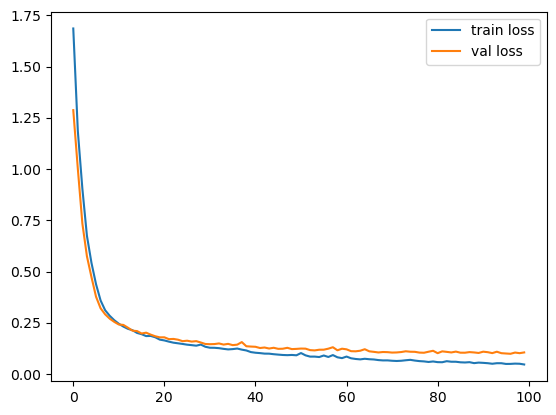

In [41]:
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)

## Evaluate Neural Network Model

Report the model's accuracy on the test set.

In [42]:
# report model accuracy on test data
model = MLP(input_dim=len(x_test[0]), output_dim=7, dropout=0.0).to(device)
model.load_state_dict(torch.load('mlp.pth'))

model.eval()
# TODO
predicted = []
for x, y in test_loader:
    temp = model(x)
    for idx, i in enumerate(temp):
        predicted.append((torch.argmax(i).item() == y[idx]).item())

print('Accuracy on test data: ', sum(predicted)/len(predicted))

Accuracy on test data:  0.9535452322738386


Just for the sake of curiosity, let's take a random sample from the test set and see the model's prediction. So, randomly choose a sample from the test set and print it out (to see its features and also the correct output). Then, feed the features into your model and see what it predicts. Is it correct?

In [43]:
import random
# TODO: choose a random sample from test data and print it out
from IPython.display import display

sample_index = random.randint(0, len(test_data_raw))
print("Before preprocessing:")
display(test_data_raw.iloc[sample_index:sample_index+1])
print('=============================================================')
print("After preprocessing:")
display(test_data.iloc[sample_index:sample_index+1])
print('=============================================================')

Before preprocessing:


,user_id,Day,origin,destination,start_time,end_time,price,origin_lat,origin_long,dest_lat,dest_long,dest
2488,3,1,work,"[restaurant, [35.765, 51.075]]",13:32:00,14:33:00,25.93,35.625,51.375,35.765,51.075,restaurant


After preprocessing:


,Day,start_time,end_time,price,origin_lat,origin_long,dest_lat,dest_long,dest,0,...,57,58,59,gym,home,park,pool,restaurant,university,work
2488,-0.875942,-0.202723,-0.124073,0.589929,-0.873639,0.980602,0.102763,-1.376699,restaurant,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
# TODO: predict the destination of the above sample
# print out the prediction
predicted_dest = torch.argmax(model(x_test[sample_index].unsqueeze(0))).item()
print("Predicted destination: ", end='')
print(predicted_dest)

Predicted destination: 0


In [45]:
# TODO: print out the actual destination of the above sample
print("Actual destination: ", end='')
print(y_test[sample_index].item())


Actual destination: 0


Now, use the inverse transform of the encoding you used earlier to get the name of the destination from the predicted class. Print it out and see if it's correct.

In [46]:
# TODO: use inverse_transform to print out the actual name of destination of the above sample
print('Name of predicted destination: ', end='')
for k, v in dest_dict.items():
    if v == predicted_dest:
        print(k)
        break
print('Name of actual destination:    ', end='')
for k, v in dest_dict.items():
    if v == y_test[sample_index].item():
        print(k)
        break

Name of predicted destination: restaurant
Name of actual destination:    restaurant


**QUESTION**: What do you think about this approach? Is it a good idea to use Neural Networks for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: Using a MLP, can be a good approach for predicting passenger destinations, especially when dealing with complex patterns. Neural networks excel at capturing non-linear relationships and automatically learning relevant features. They are adaptable and expressive. However, considerations include the need for a sufficient amount of data, computational resources for training, hyperparameter tuning, and potential challenges in model interpretability. Overall, MLPs are often robust in handling intricate patterns, but careful consideration of specific dataset characteristics is essential.

# How to Submit:

Please upload your notebook (`.ipynb`) compressed (as a `.zip` file) or uncompressed on Quera. **Note** that for each part, the accuracy of your model on the given test dataset is important. So, your accuracy should be **at least** same as ours (or better). Also, we will check your code after the submission. So, please make sure that there are no **data snooping** or **data leakage** in your code. You **can not** use the test data in any stages for your model, except for the final evaluation part! So, please be ware of that, or you may lose points.

Your project is graded via 2 main parts: 
1. Checking out your implementation (to check if there are no "data snooping" and "data leakage") 
   
2. Checking accuracies of your models on the test set. 

3. Running again your code by you in the "in-person" session and hearing your explanations (on the parts that we asked questions about the models, overfitting and etc. with tag "QUESTION" in the notebook).